# NOAA Honolulu Wind Data

This file cleans and concatenates wind data from a Honolulu weather station.

Each year of data has its own file, and missing values are expressed differently for each column.

Dates are separated into year, month, day, hour and minute columns.

**Dates are in UTC, must be changed to Hawaii time for consistency with scores data.**

## Imports

In [1]:
import pandas as pd
import numpy as np

## NOAA raw wind data

Get one file first to clean and then repeat process.

### First file 2008

In [2]:
# Read in csv, skip second row, has units
wind2008 = pd.read_csv("./data/wind/oouh1h2008.csv", skiprows=[1])


In [3]:
# 999, 99, 9999  etc are missing values
wind2008.head()

,#YY,MM,DD,hh,mm,WDI,R WSP,D GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2008,1,1,0,0,999,99.0,99.0,99,99,99,999,1013.9,999.0,25.7,999,99,99
1,2008,1,1,0,6,999,99.0,99.0,99,99,99,999,1014.0,999.0,25.7,999,99,99
2,2008,1,1,0,12,999,99.0,99.0,99,99,99,999,1014.0,999.0,25.7,999,99,99
3,2008,1,1,0,18,999,99.0,99.0,99,99,99,999,1014.1,999.0,25.7,999,99,99
4,2008,1,1,0,24,999,99.0,99.0,99,99,99,999,1014.1,999.0,25.7,999,99,99


In [8]:
# Columns of missing data have only one value: 99, 9999, etc. Add column names to list to drop them
nan_cols = []
for col in wind2008.columns:
    if len(wind2008[col].value_counts()) == 1 and col != '#YY':
        nan_cols.append(col)

nan_cols

['WVHT', 'DPD', 'APD', 'MWD', 'DEWP', 'VIS', 'TIDE']

In [9]:
wind2008.drop(columns=nan_cols)

,#YY,MM,DD,hh,mm,WDI,R WSP,D GST,PRES,ATMP,WTMP
0,2008,1,1,0,0,999,99.0,99.0,1013.9,999.0,25.7
1,2008,1,1,0,6,999,99.0,99.0,1014.0,999.0,25.7
2,2008,1,1,0,12,999,99.0,99.0,1014.0,999.0,25.7
3,2008,1,1,0,18,999,99.0,99.0,1014.1,999.0,25.7
4,2008,1,1,0,24,999,99.0,99.0,1014.1,999.0,25.7
...,...,...,...,...,...,...,...,...,...,...,...
86103,2008,12,31,23,30,276,0.6,1.0,1011.6,24.3,26.4
86104,2008,12,31,23,36,356,0.4,1.1,1011.6,24.2,26.4
86105,2008,12,31,23,42,181,1.4,2.5,1011.5,24.5,26.4
86106,2008,12,31,23,48,182,1.5,3.1,1011.5,24.5,26.4


### Repeat for all files

In [37]:
# Repeat process for yearly data files
df_list = []
for year in range(2008, 2023):
    if year == 2020:
        continue
    df = pd.read_csv(f"./data/wind/oouh1h{year}.csv", skiprows=[1])
    nan_cols = []
    for col in df.columns:
        if len(df[col].value_counts()) == 1 and col != '#YY':
            nan_cols.append(col)
    df.drop(columns=nan_cols, inplace=True)
    df_list.append(df)

wind = pd.concat(df_list)

In [38]:
wind.drop(columns=['WTMP', 'PTDY', 'PRES', 'ATMP'], inplace=True)
wind

,#YY,MM,DD,hh,mm,WDIR,R WSP,D GST
0,2008,1,1,0,0,999,99.0,99.0
1,2008,1,1,0,6,999,99.0,99.0
2,2008,1,1,0,12,999,99.0,99.0
3,2008,1,1,0,18,999,99.0,99.0
4,2008,1,1,0,24,999,99.0,99.0
...,...,...,...,...,...,...,...,...
10908,2022,1,24,0,24,50,3.6,6.7
10909,2022,1,24,0,18,10,2.1,4.6
10910,2022,1,24,0,12,360,2.1,4.6
10911,2022,1,24,0,6,60,3.1,5.1


### Missing values

In [31]:
# Visually inspect for missing values, expecting 99., 999, 9999, etc
for col in wind.columns:
    print(col, wind[col].unique())

#YY [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2021 2022]
MM [ 1  2  3  4  5  6  7  8  9 10 11 12]
DD [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
hh [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
mm [ 0  6 12 18 24 30 36 42 48 54 52]
WDIR [999 60 57 ... '280 1' '317 1' 'MM']
R WSP [99.0 3.0 2.7 1.9 0.6 2.6 3.8 2.5 3.1 1.7 4.0 3.3 2.1 4.5 3.5 3.4 1.0 2.4
 1.6 4.9 3.6 2.8 5.2 4.4 4.2 4.1 2.2 4.3 4.7 2.9 3.7 4.8 4.6 3.2 2.0 5.3
 5.0 1.8 2.3 0.5 1.5 0.9 1.2 1.3 1.4 0.3 1.1 0.7 0.8 0.1 0.4 3.9 5.1 6.7
 5.5 5.4 5.6 0.2 5.8 6.0 6.5 7.0 5.9 7.4 7.8 6.1 6.4 5.7 6.3 6.2 8.0 7.6
 7.7 6.6 8.2 6.9 7.5 7.2 7.1 7.3 8.3 8.1 10.8 9.4 8.8 6.8 8.9 9.3 9.0 7.9
 9.1 9.6 9.2 8.7 8.4 8.6 8.5 9.7 0.0 9.5 12.7 '3.8' '3.2' '2.9' '2.2'
 '2.1' '3' '2.8' '3.5' '2.3' '2.6' '1' '1.2' '1.9' '1.6' '1.8' '2' '1.7'
 '1.4' '0.6' '0.7' '2.5' '0.8' '0.3' '99' '0.9' '2.4' '0.5' '1.1' '1.5'
 '1.3' '0.4' '0.1' '0.2' '3.1' '3.4' '2

#### From output text file, these are problem values:
- 'WDIR' -> 999, '...', '280 1', 'MM'
- 'R WSP' -> 99., '99.0 9', 'MM'
- 'D GST' -> 99., '5.6', 'MM' **strings**


### Replace missing values

In [39]:
wind['WDIR'].replace(to_replace=[999, '999', '...', 'MM'], value=0, inplace=True)
wind['R WSP'].replace(to_replace=[99.0, '99.0', '...', 'MM'], value=0, inplace=True)
wind['D GST'].replace(to_replace=[99.0, '99.0', '...', 'MM'], value=0, inplace=True)

### Fix dtypes

In [44]:
wind["WDIR"] = wind["WDIR"].map(lambda x: str(x.split()[0]) if type(x) == str else x)
wind["WDIR"] = wind["WDIR"].astype(int)
wind["R WSP"] = wind["R WSP"].map(lambda x: str(x.split()[0]) if type(x) == str else x)
wind["R WSP"] = wind["R WSP"].astype(float)
wind["D GST"] = wind["D GST"].map(lambda x: str(x.split()[0]) if type(x) == str else x)
wind["D GST"] = wind["D GST"].astype(float)


In [45]:
# Sanity check
wind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129194 entries, 0 to 10912
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   #YY     1129194 non-null  int64  
 1   MM      1129194 non-null  int64  
 2   DD      1129194 non-null  int64  
 3   hh      1129194 non-null  int64  
 4   mm      1129194 non-null  int64  
 5   WDIR    1129194 non-null  int64  
 6   R WSP   1129194 non-null  float64
 7   D GST   1129194 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 77.5 MB


### Human readable columns

In [46]:
# Rename columns for ease of use.
wind.rename(
    columns={
        "WDIR": "wind_direction",
        "R WSP": "wind_speed",
        "D GST": "gust_speed",
    },
    inplace=True,
)


### Date conversions

Convert date columns to strings and add '0' where necessary.

In [47]:
wind['MM'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [48]:
wind["MM"] = wind["MM"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))
wind["MM"].unique()


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [49]:
wind["DD"] = wind["DD"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))
wind['DD'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [50]:
wind["hh"] = wind["hh"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))
wind['hh'].unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [51]:
wind["mm"] = wind["mm"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))
wind['mm'].unique()

array(['00', '06', '12', '18', '24', '30', '36', '42', '48', '54', '52'],
      dtype=object)

### Create a date column with correct format from other cols.

In [52]:
# Create a date column with the format '2018-10-26 12:00'
wind["date"] = (
    "'"
    + wind["#YY"].astype(str)
    + '-'
    + wind["MM"].astype(str)
    + '-'
    + wind["DD"].astype(str)
    + ' '
    + wind["hh"].astype(str)
    + ':'
    + wind["mm"].astype(str)
    + "'"
)


In [53]:
wind.head()

,#YY,MM,DD,hh,mm,wind_direction,wind_speed,gust_speed,date
0,2008,01,01,00,00,0,0.0,0.0,'2008-01-01 00:00'
1,2008,01,01,00,06,0,0.0,0.0,'2008-01-01 00:06'
2,2008,01,01,00,12,0,0.0,0.0,'2008-01-01 00:12'
3,2008,01,01,00,18,0,0.0,0.0,'2008-01-01 00:18'
4,2008,01,01,00,24,0,0.0,0.0,'2008-01-01 00:24'


### Convert date column to datetime format

In [56]:
# With help from https://stackoverflow.com/questions/32344533/how-do-i-round-datetime-column-to-nearest-quarter-hour
# Round to nearest half hour
# Subtract 10 hours to convert from UTC to Hawaii time

wind["date"] = pd.to_datetime(wind["date"]) - pd.DateOffset(hours=10)  
wind.drop(columns=["#YY", "MM", "DD", "hh", "mm"], inplace=True)
wind.head()


,wind_direction,wind_speed,gust_speed,date
0,0,0.0,0.0,2007-12-31 14:00:00
1,0,0.0,0.0,2007-12-31 14:06:00
2,0,0.0,0.0,2007-12-31 14:12:00
3,0,0.0,0.0,2007-12-31 14:18:00
4,0,0.0,0.0,2007-12-31 14:24:00


### Sort by date and move to index

In [57]:
wind.sort_values(by='date', inplace=True)

In [58]:
wind.set_index('date', inplace=True)

### Resample to 30 minute periods and take the mean

In [59]:
wind = wind.resample('30min').mean()
wind.tail()

,wind_direction,wind_speed,gust_speed
date,,,
2007-12-31 14:00:00,0.0,0.0,0.0
2007-12-31 14:30:00,0.0,0.0,0.0
2007-12-31 15:00:00,0.0,0.0,0.0
2007-12-31 15:30:00,0.0,0.0,0.0
2007-12-31 16:00:00,0.0,0.0,0.0


### Since we only have competition dates from 2014 on, keep those dates only. This also fixes the sampling frequency to ~30 min

In [61]:
wind = wind[wind.index.year > 2013]

### Visual check

There are some gaps with no station data.

<AxesSubplot:xlabel='date'>

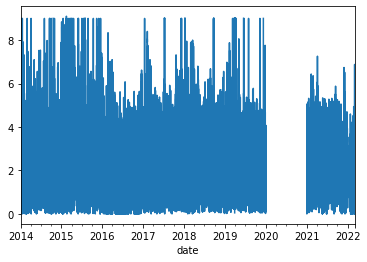

In [62]:
wind['wind_speed'].plot()

In [63]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143536 entries, 2014-01-01 00:00:00 to 2022-03-10 07:30:00
Freq: 30T
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   wind_direction  123127 non-null  float64
 1   wind_speed      123127 non-null  float64
 2   gust_speed      123127 non-null  float64
dtypes: float64(3)
memory usage: 4.4 MB


### Replace wind direction with sin and cos columns for modeling

In [64]:
# With help from
# https://dax-nb-preview-prod.s3.us.cloud-object-storage.appdomain.cloud/jfk-weather-data/Part%201%20-%20Data%20Cleaning.html#2.6-Feature-encoding

wind['wind_direction_sin'] = np.sin(wind['wind_direction']*(2.*np.pi/360))
wind['wind_direction_cos'] = np.cos(wind['wind_direction']*(2.*np.pi/360))

# Drop original wave direction column
wind.drop(columns='wind_direction', inplace=True)

## Save clean and merged mind data to merge with scores for modeling

In [65]:
wind

,wind_speed,gust_speed,wind_direction_sin,wind_direction_cos
date,,,,
2014-01-01 00:00:00,0.28,0.78,0.907777,-0.419452
2014-01-01 00:30:00,0.18,0.44,0.866025,-0.500000
2014-01-01 01:00:00,0.26,0.58,0.866025,-0.500000
2014-01-01 01:30:00,0.06,0.34,0.999701,-0.024432
2014-01-01 02:00:00,0.28,0.54,0.819152,0.573576
...,...,...,...,...
2022-03-10 05:30:00,0.30,0.30,0.615661,0.788011
2022-03-10 06:00:00,0.10,0.70,0.104528,0.994522
2022-03-10 06:30:00,0.20,0.60,0.994522,0.104528


In [66]:
wind.to_csv('./data/wind/oahu_wind.csv')